In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires_CLEANED_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [5]:
y = df['FWI']

In [6]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [7]:
df = df.drop(["Unnamed: 0","day","month","year"], axis=1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
x = df.drop(['FWI'], axis = 1)

In [10]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


### FEATURE SELECTION

<AxesSubplot: >

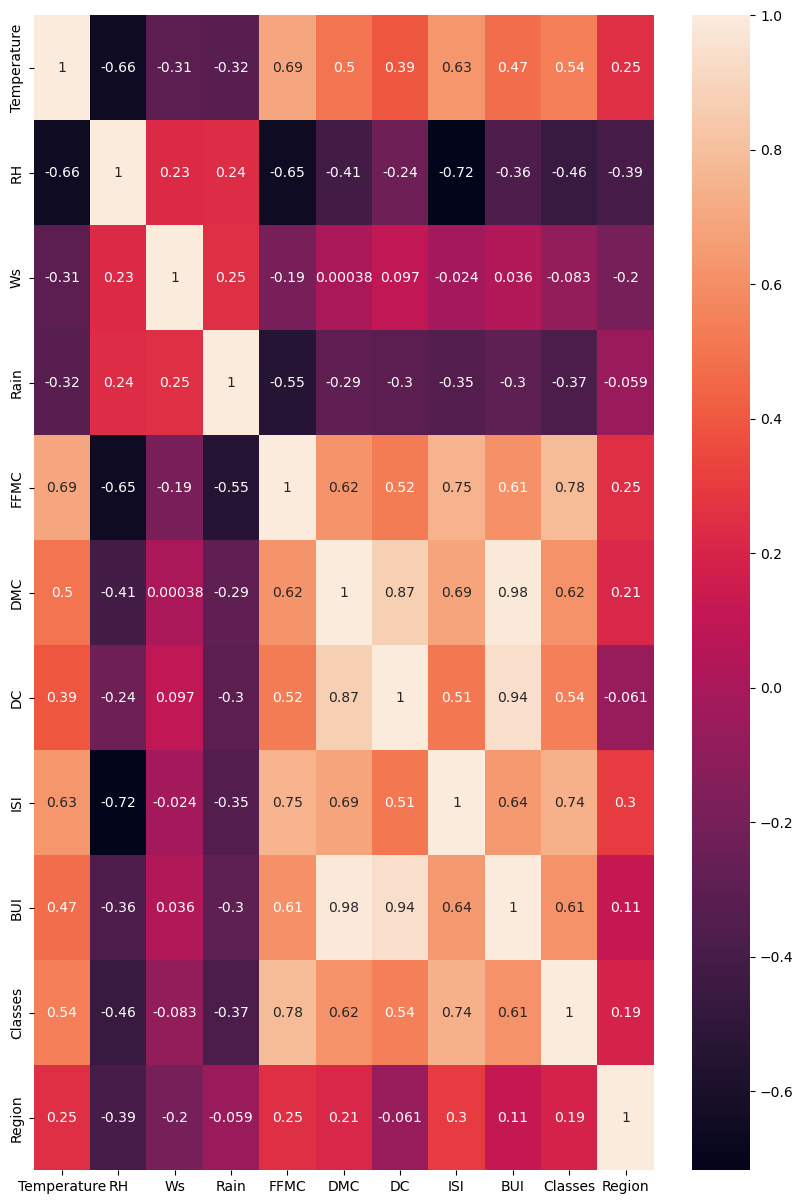

In [13]:
plt.figure(figsize = (10,15))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [14]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr
                   

In [15]:
corr_feature = correlation(X_train, 0.85)

In [16]:
corr_feature

{'BUI', 'DC'}

#both BUI and DC - Independent features are dependent on each other
our job is to remove one of this 

In [17]:
#drop feature


X_train.drop(corr_feature, axis = 1, inplace = True)
X_test.drop(corr_feature, axis = 1, inplace = True)

In [18]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## BOX PLot to understand Effect of Standard Scaler

/tmp/ipykernel_498/3573292064.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<AxesSubplot: title={'center': 'After on X_train Scaled'}>

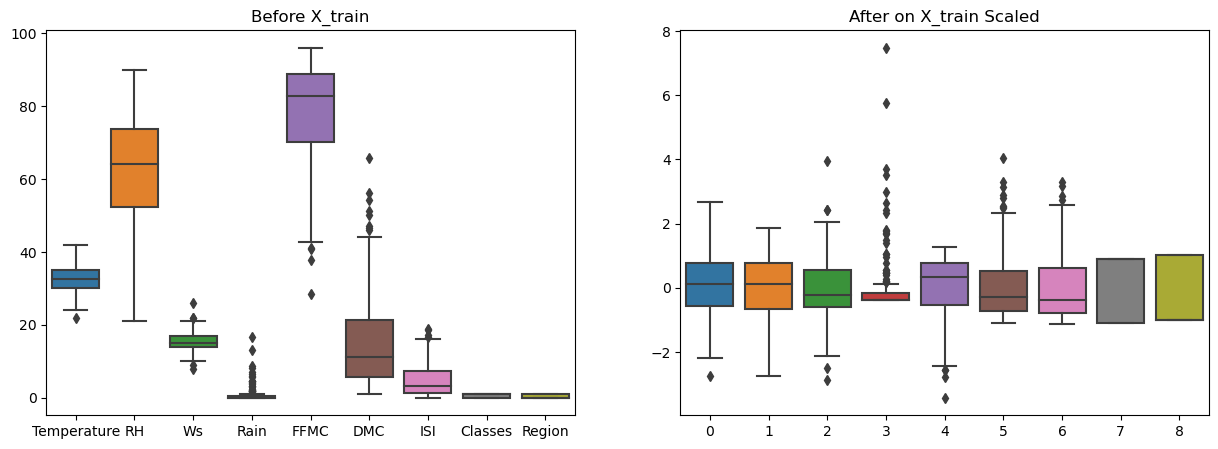

In [20]:
plt.subplots(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Before X_train")
sns.boxplot(X_train)

plt.subplot(1,2,2)
plt.title("After on X_train Scaled")
sns.boxplot(X_train_scaled)

## Model Training

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
regressor.intercept_

7.156043956043957

In [25]:
regressor.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298,  0.40422124, -0.39259928])

## Predict the test data

In [26]:
y_pred_test = regressor.predict(X_test_scaled)

## MSE, MAE, RMSE

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

## Accuracy of our Model

In [28]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)

In [29]:
mae, score

(0.5468236465249985, 0.9847657384266951)

## LASSO REGRESSION MODEL 

In [30]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_test2 = lasso.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae2 = mean_absolute_error(y_test, y_pred_test2)


In [32]:
from sklearn.metrics import r2_score

score2 = r2_score(y_test, y_pred_test2)

In [33]:
mae2, score2

(1.133175994914409, 0.9492020263112388)

# RIDGE REGRESSION MODEL 

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_test3 = ridge.predict(X_test_scaled)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae3 = mean_absolute_error(y_test, y_pred_test3)


In [36]:
from sklearn.metrics import r2_score

score3 = r2_score(y_test, y_pred_test3)

In [37]:
mae3, score3

(0.5642305340105692, 0.9842993364555513)

## ELASTIC REGRESSION

In [38]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred_test4 = ridge.predict(X_test_scaled)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae4 = mean_absolute_error(y_test, y_pred_test4)

In [40]:
from sklearn.metrics import r2_score
score4 = r2_score(y_test, y_pred_test4)

In [41]:
mae4, score4

(0.5642305340105692, 0.9842993364555513)

## PICKLING

In [43]:
import pickle

In [45]:
pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(ridge,open('ridge.pkl', 'wb'))